## Classification, Callibration, Risk, Asymmetry, and Comparison

Multiple plots here from: Provost, Foster; Fawcett, Tom (2013-07-27). Data Science for Business: What you need to know about data mining and data-analytic thinking

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image

In [2]:
df=pd.read_csv("https://dl.dropboxusercontent.com/u/75194/stats/data/01_heights_weights_genders.csv")
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

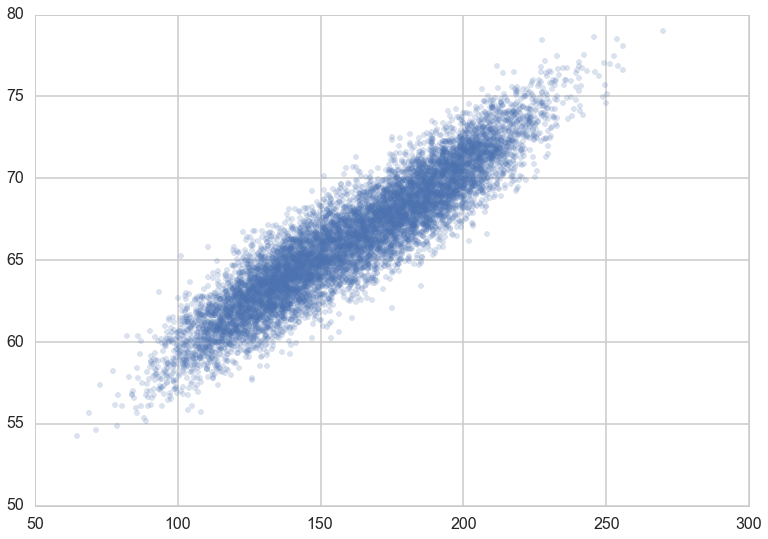

In [3]:
plt.plot(df.Weight, df.Height, '.', alpha=0.2);

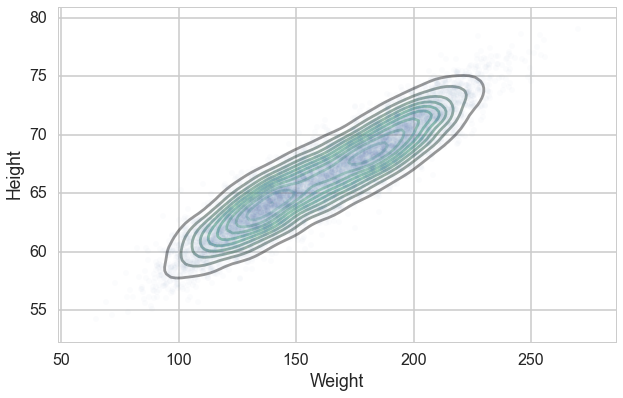

In [4]:
plt.figure(figsize=(10,6))
ax=sns.kdeplot(df.Weight, df.Height, alpha=0.5);
ax.plot(df.Weight, df.Height, '.', alpha=0.02)


In [5]:
dfdata = df[['Weight', 'Height']].values
dfresu = (df['Gender'] == "Male")*1
print dfdata.shape, dfresu.shape

(10000, 2) (10000,)


###Discriminative classifier

In a discriminative classifier like logistic regression you directly model the posterior  $P_{Y|X} = p(y| x)dy$ directly. The relationship between Logistic and a gaussian mixture model is that you tie the covariance matrices in the two groups together.

In [6]:
from sklearn.linear_model import LogisticRegression
def cv_optimize_logistic(X, y, n_folds=10):
    clf = LogisticRegression()
    parameters = {"C": [0.01, 0.1, 1, 10, 100]}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_
    best = gs.best_estimator_
    return best

In [7]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


def points_plot2(X, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    plt.figure(figsize=(10,6))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, s=50, alpha=0.2,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=0.5, marker="s", s=35)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return plt.gca()

In [8]:
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
def points_plot_prob(X, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    plt.figure(figsize=(10,6))
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cm_bright, s=10, alpha=0.2)
    # and testing points
    yact=clf.predict(Xte)
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cm_bright, alpha=0.2, marker="s", s=10)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)
    cs2 = plt.contour(xx, yy, Z, cmap=cm, alpha=.6)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)
    return plt.gca() 

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

dftrain, dftest, resutrain, resutest = train_test_split(dfdata, dfresu, train_size=0.8)
dflogis = cv_optimize_logistic(dftrain, resutrain)

###Classifiers output probabilities

One can show that choosing the class which has the higher probability
is the optimal thing to do. This is called the "Bayes Risk".

In [33]:
dflogis.predict_proba(dftest)

array([[ 0.98561623,  0.01438377],
       [ 0.99685855,  0.00314145],
       [ 0.53240329,  0.46759671],
       ..., 
       [ 0.52290412,  0.47709588],
       [ 0.86398177,  0.13601823],
       [ 0.99709521,  0.00290479]])

BEST {'C': 0.01} 0.92125


//anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
//anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


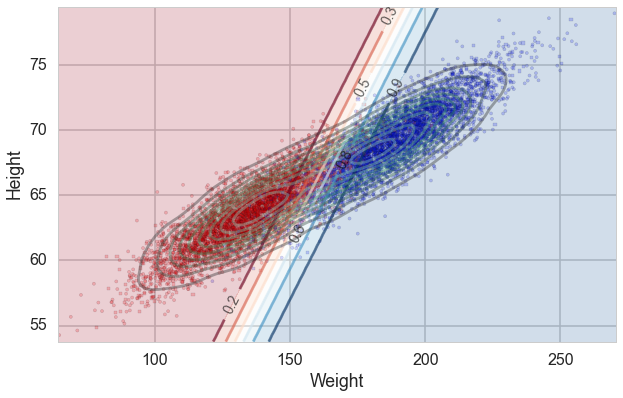

In [9]:
points_plot_prob(dfdata, dftrain, dftest, resutrain, resutest, dflogis)

###Callibration

A classifier like Logistic regression outputs probabilities. You must check its callibration: ie the notion that a samples with probability p occur a fraction p of the time in test sets.

(Based on Chris Beaumont's diagram in cs109 hw 3 (2013))

![](https://dl.dropboxusercontent.com/u/75194/images/bookimages/callibration.png)

In [14]:
def calibration_plot(clf, xtest, ytest):
    prob = clf.predict_proba(xtest)[:, 1]
    outcome = ytest
    data = pd.DataFrame(dict(prob=prob, outcome=outcome))

    #group outcomes into bins of similar probability
    bins = np.linspace(0, 1, 20)
    cuts = pd.cut(prob, bins)
    binwidth = bins[1] - bins[0]
    
    #freshness ratio and number of examples in each bin
    cal = data.groupby(cuts).outcome.agg(['mean', 'count'])
    cal['pmid'] = (bins[:-1] + bins[1:]) / 2
    cal['sig'] = np.sqrt(cal.pmid * (1 - cal.pmid) / cal['count'])
        
    #the calibration plot
    ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    p = plt.errorbar(cal.pmid, cal['mean'], cal['sig'])
    plt.plot(cal.pmid, cal.pmid, linestyle='--', lw=1, color='k')
    plt.ylabel("Empirical Fraction")

    
    #the distribution of P(fresh)
    ax = plt.subplot2grid((3, 1), (2, 0), sharex=ax)
    #calsum = cal['count'].sum()
    plt.bar(left=cal.pmid - binwidth / 2, height=cal['count'],
            width=.95 * (bins[1] - bins[0]),
            fc=p[0].get_color())
    plt.xlabel("Classifier Probability")


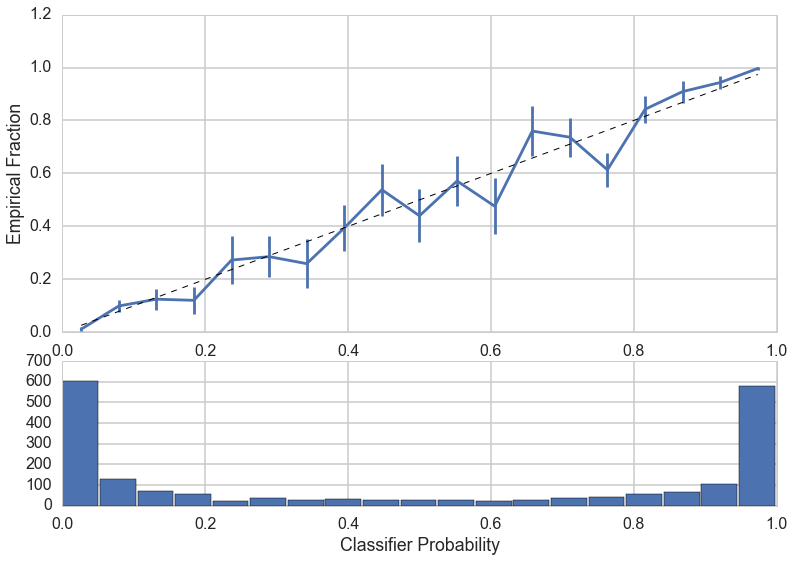

In [15]:
calibration_plot(dflogis, dftest, resutest)

###Classifier Evaluation

The confusion matrix is the basic starting point.

![confmatrix](https://dl.dropboxusercontent.com/u/75194/images/bookimages/confusionmatrix.png)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dflogis.predict(dftest), resutest)

array([[931,  89],
       [ 84, 896]])

###Other metrics


**Recall** tells you how many of the true positives were recalled:

$$Recall = \frac{TP}{OP} = \frac{TP}{TP+FN}.$$

**Precision** tells you how many of the returned hits (+ives) were truly positive

$$Precision = \frac{TP}{PP} = \frac{TP}{TP+FP}.$$

$$F1 =  \frac{2*Recall*Precision}{Recall + Precision}$$

###Changing the risk function

What if the risk is asymmetric? Its not optimal any more to have the probability "decision boundary" at 0.5.

Instead we choose 1 if:

$$p_0 < r p_1$$

where

$$r >1 $$

and we are optimizing recall. In other words we want to minimize false negatives and will tolerate false positives for this. Imagine positive or 1 is "having cancer". You will tolerate true 0's (no cancer) predicted as 1 (cancer):its a biopsy, but you wont tolerate true 1's predicted as 0.

In [19]:
dfpc=pd.read_csv("https://dl.dropboxusercontent.com/u/75194/pcs.csv")
dfpc.head()

Unnamed: 0  label           pc1          pc2  y
0           0  check -22536.362571  2428.343967  1
1           1  check -22226.658684   709.255778  1
2           2  check -17364.260784  4252.027148  1
3           3  check -22847.256199   900.591903  1
4           4  check -15868.672595 -3259.491423  1

In [21]:
from sklearn.cross_validation import train_test_split
ys=dfpc['y'].astype(int).values
subdf=dfpc[['pc1','pc2']]
subdfstd=(subdf - subdf.mean())/subdf.std()
Xs=subdfstd.values

In [22]:
from sklearn.grid_search import GridSearchCV
def points_plot_asymm(X, Xtr, Xte, ytr, yte, clf, r, colorscale=cmap_light, cdiscrete=cmap_bold):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    plt.figure(figsize=(10,6))
    p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
    p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = p0 < r*p1
    print Z.sum(), Z.mean()
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, s=50, alpha=0.2,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=0.5, marker="s", s=35)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return plt.gca()

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
def make_myscorer(r):
    def my_scorer(est, X, y):
        probs=est.predict_proba(X)
        p0 = probs[:,0]
        p1 = probs[:,1]
        ypred = (p0 < r*p1)*1
        return recall_score(y, ypred)
    return my_scorer

def cv_optimize_knn_ASYMM(X, y, k, n_folds=10):
    clf = KNeighborsClassifier()
    parameters = {"n_neighbors": range(1,40,1)}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=make_myscorer(k))
    gs.fit(X,y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best


BEST {'n_neighbors': 7} 1.0 [mean: 0.86473, std: 0.16330, params: {'n_neighbors': 1}, mean: 0.89855, std: 0.15275, params: {'n_neighbors': 2}, mean: 0.93237, std: 0.13333, params: {'n_neighbors': 3}, mean: 0.93237, std: 0.13333, params: {'n_neighbors': 4}, mean: 0.93237, std: 0.13333, params: {'n_neighbors': 5}, mean: 0.93237, std: 0.13333, params: {'n_neighbors': 6}, mean: 1.00000, std: 0.00000, params: {'n_neighbors': 7}, mean: 1.00000, std: 0.00000, params: {'n_neighbors': 8}, mean: 1.00000, std: 0.00000, params: {'n_neighbors': 9}, mean: 1.00000, std: 0.00000, params: {'n_neighbors': 10}, mean: 1.00000, std: 0.00000, params: {'n_neighbors': 11}, mean: 0.93237, std: 0.13333, params: {'n_neighbors': 12}, mean: 0.93237, std: 0.13333, params: {'n_neighbors': 13}, mean: 0.96618, std: 0.10000, params: {'n_neighbors': 14}, mean: 0.96618, std: 0.10000, params: {'n_neighbors': 15}, mean: 0.96618, std: 0.10000, params: {'n_neighbors': 16}, mean: 0.96618, std: 0.10000, params: {'n_neighbors':

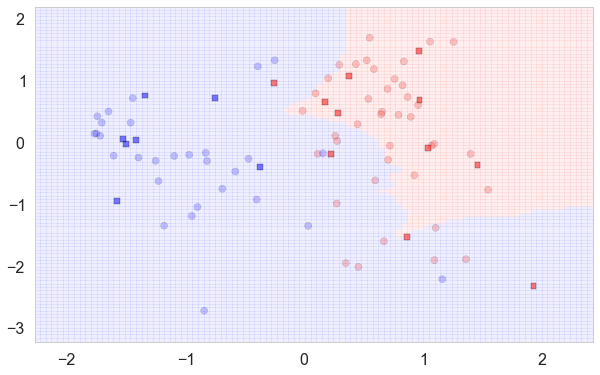

In [30]:
from sklearn.neighbors import KNeighborsClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(Xs, ys, train_size=0.8)
bestcv2 = cv_optimize_knn_ASYMM(Xtrain, ytrain, 10)
points_plot_asymm(Xs, Xtrain, Xtest, ytrain, ytest, bestcv2, 10)

In [31]:
def repredict(est,r, xtest):
    probs=est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p0 < r*p1)*1
    return ypred
confusion_matrix(ytest, repredict(bestcv2, 10, Xtest))

array([[7, 4],
       [0, 7]])

###ROC Curve

![roc space](https://dl.dropboxusercontent.com/u/75194/ROCspace.png)
Let $p(y=1|x) > t$ mean $g(x)=1$. $t$ is the threshold. We move it from 0 to 1 and get different TPR and FPR and plot TPR against FPR.

$$TPR = Recall = \frac{TP}{OP} = \frac{TP}{TP+FN}.$$

(also called Hit Rate: % of observed +ives classifier gets right)

$$FPR = \frac{FP}{ON} = \frac{FP}{FP+TN}$$

(also called False Alarm Rate, % of -ive examples classifier gets wrong)
the tp rate is sometimes referred to as the hit rate— what percent of the actual positives does the classifier get right. The fp rate is sometimes referred to as the false alarm rate— what percent of the actual negative examples does the classifier get wrong (i.e., predict to be positive).

Provost, Foster; Fawcett, Tom (2013-07-27). Data Science for Business: What you need to know about data mining and data-analytic thinking (Kindle Locations 4766-4769).

![roc curve](https://dl.dropboxusercontent.com/u/75194/roc-curve.png)

![howto roc](https://dl.dropboxusercontent.com/u/75194/howtoroc.png)

In [50]:
from sklearn.metrics import roc_curve, auc


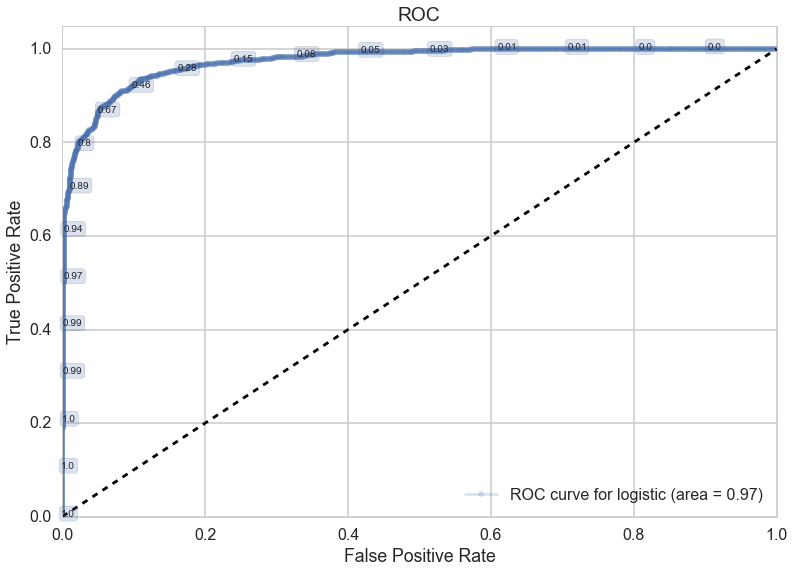

In [88]:
def make_roc(name, clf, ytest, xtest, ax=None, labe=5):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, '.-', alpha=0.2, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in xrange(0, fpr.shape[0],labe):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax
make_roc("logistic", dflogis, resutest, dftest, labe=100)

###Classifier Comparison

In [34]:
#data set from yhathq: http://blog.yhathq.com/posts/predicting-customer-churn-with-sklearn.html
dfchurn=pd.read_csv("https://dl.dropboxusercontent.com/u/75194/churn.csv")
dfchurn.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  VMail Message  Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  CustServ Calls  Churn?
0    KS             128        415  382-4657         no        yes             25     265.1        110       45.07     197.4         99       16.78       244.7           91         11.01       10.0           3         2.70               1  False.
1    OH             107        415  371-7191         no        yes             26     161.6        123       27.47     195.5        103       16.62       254.4          103         11.45       13.7           3         3.70               1  False.
2    NJ             137        415  358-1921         no         no              0     243.4        114       41.38     121.2        110       10.30       162.6          104          7.32       12.2           5         3.29               0  False.
3    OH              84        408  375-9999        yes         no              0     299.4         71       50.90      61.9         88        5.26       196.9           89          8.86        6.6           7         1.78               2  False.
4    OK              75        415  330-6626        yes         no              0     166.7        113       28.34     148.3        122       12.61       186.9          121          8.41       10.1           3         2.73               3  False.

In [36]:
ychurn = np.where(dfchurn['Churn?'] == 'True.',1,0)
ychurn.mean()

0.14491449144914492

In [37]:
dfchurn.columns

Index([u'State', u'Account Length', u'Area Code', u'Phone', u'Int'l Plan', u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls', u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins', u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls', u'Intl Charge', u'CustServ Calls', u'Churn?'], dtype='object')

In [40]:
dfchurn["Int'l Plan"] = dfchurn["Int'l Plan"]=='yes'
dfchurn["VMail Plan"] = dfchurn["VMail Plan"]=='yes'

In [41]:
colswewant=[ u'Account Length', u"Int'l Plan", u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls', u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins', u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls', u'Intl Charge', u'CustServ Calls']

In [43]:
X = dfchurn[colswewant].astype(np.float)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [44]:
def cv_optimize(clf, parameters, X, y, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best
def do_classify(clf, parameters, indf, inacidlist, clon, clonval, train_size=0.6):
    subdf=indf[inacidlist]
    subdfstd=(subdf - subdf.mean())/subdf.std()
    X=subdfstd.values
    y=(indf[clon].values==clonval)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    return clf, Xtrain, ytrain, Xtest, ytest

In [45]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

####Random Forests

Descision trees are very simple things we are all familiar with. If a problem is multi-dimensional, the tree goes dimension by dimension and makes cuts in the space to create a classifier.

From scikit-docs:
    
![](http://scikit-learn.org/stable/_images/iris.svg)

We use it to create a random forest from a set of trees. We do two things:

* **Bagging** : here we create a bootstrap sample with replacement and we run on this sample
* We choose random subsets of the features for each tree

From Johnson, again:

![random forest](https://dl.dropboxusercontent.com/u/75194/BDF/randforest.png)

When we do this we get trees lke the ones seen in the diagram above. What we do now, is that for each region of the space (on some suitable grid) we find out what result each tree gives us. Then we go majority vote, like in kNN. This process of resampling and averaging over the trees reduces the overfitting a bit.
For two features the second dosent make a huge amount of sense, but lets see it as we can see that the overfitting is softened a bit by the averaging:

In [46]:
clf = KNeighborsClassifier()
parameters = {"n_neighbors": range(1,40,1)}
clfknn, Xtrain, ytrain, Xtest, ytest=do_classify(clf, parameters, dfchurn, colswewant,'Churn?', "True.")

BEST {'n_neighbors': 9} 0.894447223612 [mean: 0.87694, std: 0.01005, params: {'n_neighbors': 1}, mean: 0.88494, std: 0.01156, params: {'n_neighbors': 2}, mean: 0.88944, std: 0.01610, params: {'n_neighbors': 3}, mean: 0.88794, std: 0.00743, params: {'n_neighbors': 4}, mean: 0.89395, std: 0.00796, params: {'n_neighbors': 5}, mean: 0.88594, std: 0.00662, params: {'n_neighbors': 6}, mean: 0.89345, std: 0.01081, params: {'n_neighbors': 7}, mean: 0.88594, std: 0.00560, params: {'n_neighbors': 8}, mean: 0.89445, std: 0.00512, params: {'n_neighbors': 9}, mean: 0.88644, std: 0.00460, params: {'n_neighbors': 10}, mean: 0.89145, std: 0.00438, params: {'n_neighbors': 11}, mean: 0.88344, std: 0.00337, params: {'n_neighbors': 12}, mean: 0.89095, std: 0.00376, params: {'n_neighbors': 13}, mean: 0.88394, std: 0.00463, params: {'n_neighbors': 14}, mean: 0.89045, std: 0.00537, params: {'n_neighbors': 15}, mean: 0.88294, std: 0.00328, params: {'n_neighbors': 16}, mean: 0.88594, std: 0.00368, params: {'n_

In [47]:
def classify_tree(clf, indf, inacidlist, clon, clonval, train_size=0.6):
    subdf=indf[inacidlist]
    subdfstd=(subdf - subdf.mean())/subdf.std()
    X=subdfstd.values
    y=(indf[clon].values==clonval)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    return clf, Xtrain, ytrain, Xtest, ytest
clfrf=RandomForestClassifier(n_estimators=100)
clfrf, Xtrain, ytrain, Xtest, ytest=classify_tree(clfrf, dfchurn, colswewant,'Churn?', "True.")

Accuracy on training data: 1.00
Accuracy on test data:     0.96


In [48]:
confusion_matrix(clfknn.predict(Xtest), ytest)

array([[1131,  124],
       [   9,   70]])

In [49]:
confusion_matrix(clfrf.predict(Xtest), ytest)

array([[1130,   46],
       [  10,  148]])

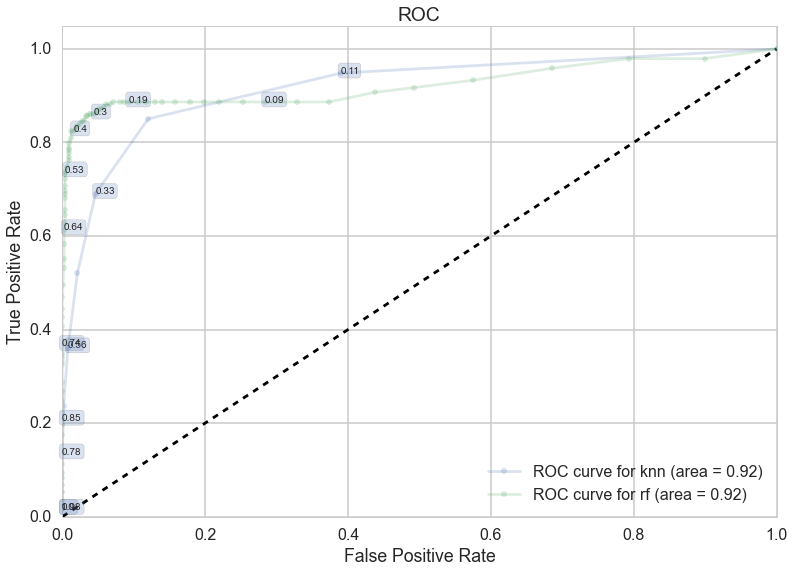

In [89]:
ax=make_roc("knn",clfknn, ytest, Xtest, None, labe=2)
make_roc("rf",clfrf, ytest, Xtest, ax, labe=10);

"A false positive occurs when we classify a consumer as a likely responder and therefore target her, but she does not respond."
(Provost, Foster; Fawcett, Tom. Data Science for Business)

So here we want to minimize the false positives and RF does a better job in that regime. So we would choose it.

####A note on asymmetry

![abmodeldiag](https://dl.dropboxusercontent.com/u/75194/abmodeldiag.png)

A has large FP, B has large FN. on asymmetric, A will do very bad.

The way to understand this goes back to our r, which we can show is given by:

$$r = = \frac{l_{FN}}{l_{FP}}$$

We look for lines with slope

$$\frac{p(0)}{r\,p(1)} = \frac{p(-)}{r\,p(+)}$$

So for r about 10 which penalizes FN, and a -/+ ration of about 10, we get a slope of 1 or lower. To penalize FP we get really high slopes. We look for where the lines intersect the convex hull of the ROC curves to choose a classifier. (http://www.nssl.noaa.gov/users/brooks/public_html/feda/papers/ProvostandFawcettKDD-97.pdf)